In [ ]:
#-----------------------------------> Atharva Chaudhari <--------------------------------------

In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [17]:
taxi=pd.read_csv("TaxiFare.csv")

In [69]:
taxi.head(20) 

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,mornight
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,13,Monday,6,2009,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,12,Tuesday,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17,17,20,Wednesday,8,2011,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,0,Saturday,4,2012,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,3,Tuesday,3,2010,0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011-01-06,6,5,Thursday,1,2011,0
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012-11-20,20,16,Tuesday,11,2012,1
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012-01-04,4,13,Wednesday,1,2012,1
8,9.0,-74.006462,40.726713,-73.993078,40.731628,1,2012-12-03,3,9,Monday,12,2012,0
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009-09-01,1,21,Tuesday,9,2009,1


In [19]:
taxi.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [20]:
taxi.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [21]:
taxi.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [22]:
taxi.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [23]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [24]:
taxi.shape

(50000, 8)

In [25]:
taxi.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
47820,30:18.0,21.0,2012-11-03 21:30:18 UTC,-73.949062,40.797232,-73.992181,40.749013,1
40748,33:23.0,8.1,2011-09-14 22:33:23 UTC,-74.001985,40.724439,-74.011412,40.707096,1
31073,06:22.0,12.9,2011-11-09 04:06:22 UTC,-73.991989,40.740074,-73.976911,40.733675,1
4788,22:20.0,11.7,2009-02-16 11:22:20 UTC,-73.968224,40.754568,-73.995719,40.709330,1
38332,07:00.0,9.3,2009-03-02 06:07:00 UTC,-74.009327,40.702697,-73.977943,40.690357,5
17783,11:37.0,10.1,2010-02-15 22:11:37 UTC,-73.994680,40.680529,-74.009704,40.711531,1
19691,45:17.0,11.5,2013-03-29 16:45:17 UTC,-73.965236,40.774794,-73.970771,40.758681,1
6243,01:58.0,5.7,2011-12-10 00:01:58 UTC,-73.983287,40.726089,-73.998854,40.734238,1
30091,23:33.0,7.4,2009-03-29 20:23:33 UTC,-73.987985,40.750772,-73.973610,40.755567,1
38655,49:12.0,17.5,2014-03-03 07:49:12 UTC,-74.007129,40.704070,-73.970274,40.758168,1


In [28]:
taxi.drop(["unique_id"],axis=1,inplace=True)

In [29]:
taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [42]:
import calendar
import datetime

In [51]:
pd.to_datetime(taxi['date_time_of_pickup'])

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
49995   2013-06-12 23:25:15+00:00
49996   2015-06-22 17:19:18+00:00
49997   2011-01-30 04:53:00+00:00
49998   2012-11-06 07:09:00+00:00
49999   2010-01-13 08:13:14+00:00
Name: date_time_of_pickup, Length: 50000, dtype: datetime64[ns, UTC]

In [56]:
taxi['date_time_of_pickup']=pd.to_datetime(taxi['date_time_of_pickup'])-datetime.timedelta(hours=4)

In [57]:
### taxi['Year']=taxi['date_time_of_pickup'].dt.year
### taxi['Month']=taxi['date_time_of_pickup'].dt.month
##  taxi['Day']=taxi['date_time_of_pickup'].dt.day
##  taxi['Hours']=taxi['date_time_of_pickup'].dt.hour
##  taxi['Minutes']=taxi['date_time_of_pickup'].dt.minute

In [58]:
taxi["pickup_date"]=taxi["date_time_of_pickup"].dt.date
taxi["pickup_day"]=taxi["date_time_of_pickup"].apply(lambda x:x.day)
taxi["pickup_hour"]=taxi["date_time_of_pickup"].apply(lambda x:x.hour)
taxi["pickup_day_of_week"]=taxi["date_time_of_pickup"].apply(lambda x:calendar.day_name[x.weekday()])
taxi["pickup_month"]=taxi["date_time_of_pickup"].apply(lambda x:x.month)
taxi["pickup_year"]=taxi["date_time_of_pickup"].apply(lambda x:x.year)
taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,13,Monday,6,2009
1,16.9,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,12,Tuesday,1,2010
2,5.7,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17,17,20,Wednesday,8,2011
3,7.7,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,0,Saturday,4,2012
4,5.3,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,3,Tuesday,3,2010


In [59]:
taxi.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.689260,12.037400,6.277660,2011.738560
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660559,5.848911,3.461942,1.862804
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2008.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,7.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,12.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,17.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [62]:
taxi['mornight']=np.where(taxi['pickup_hour']<12,0,1)

In [63]:
taxi.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
mornight                0
dtype: int64

In [64]:
taxi.shape

(50000, 14)

In [92]:
taxi["latitude_of_dropoff"].unique()

array([40.712278  , 40.782004  , 40.750562  , ..., 40.705993  ,
       40.76059723, 40.763805  ])

In [66]:
taxi.drop(["date_time_of_pickup"],axis=1,inplace=True)

In [109]:
taxi["no_of_passenger"].max()

6

In [78]:
taxi['longitude_of_pickup'].min()

-75.42384832

In [79]:
taxi["longitude_of_pickup"].max()

40.783472

In [80]:
taxi['longitude_of_dropoff'].min()

-84.654241

In [81]:
taxi['longitude_of_dropoff'].max()

40.851027

In [82]:
taxi['latitude_of_pickup'].min()

-74.006893

In [83]:
taxi['latitude_of_pickup'].max()

401.083332

In [84]:
taxi['latitude_of_dropoff'].max()

43.41519

In [85]:
taxi['latitude_of_dropoff'].min()

-74.006377

In [87]:
taxi=taxi[((taxi["longitude_of_pickup"] > -78 ) & (taxi["longitude_of_pickup"] < -70 )) &  #it is between 70-78
          ((taxi["longitude_of_dropoff"] > -78) & (taxi["longitude_of_dropoff"] <-70 )) &  # it is between 70-78
          ((taxi["latitude_of_pickup"] > 37) & (taxi["latitude_of_pickup"] < 45 )) &       # it is between 37-45
          ((taxi["latitude_of_dropoff"] > 37) & (taxi["latitude_of_dropoff"] < 45 ))&      # it is between 37-45
          (taxi["no_of_passenger"] >0 ) & (taxi["amount"] >= 2.5)]

In [88]:
taxi.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year,mornight
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.682540,12.031617,6.280516,2011.739073,0.539106
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659498,5.847347,3.461965,1.867915,0.498473
min,2.500000,-75.423848,38.754215,-75.354559,39.604971,1.00000,1.000000,0.000000,1.000000,2008.000000,0.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,7.000000,3.000000,2010.000000,0.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,12.000000,6.000000,2012.000000,1.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,17.000000,9.000000,2013.000000,1.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000,1.000000


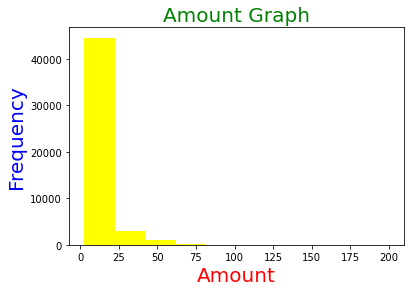

In [97]:
plt.hist(x=taxi["amount"],color="yellow")
plt.title("Amount Graph",fontsize=20,color="green")
plt.xlabel("Amount",fontsize=20,color="red")
plt.ylabel("Frequency",fontsize=20,color="blue")
plt.show()

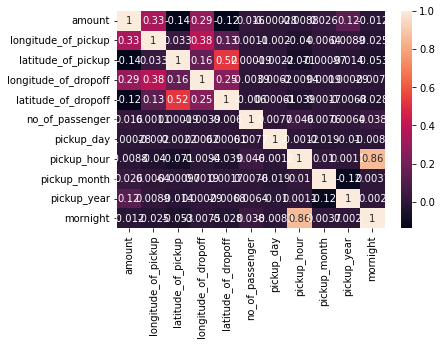

In [98]:
# Compute The correlation matrix
corr_matrix=taxi.corr()

# Create heatmap of correlation matrix
sns.heatmap(corr_matrix,annot=True)

plt.show()

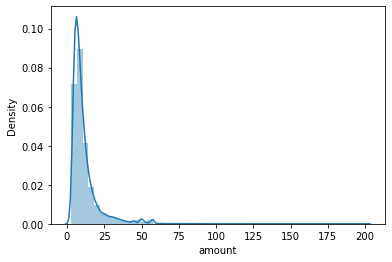

In [99]:
sns.distplot(taxi["amount"])
plt.show()

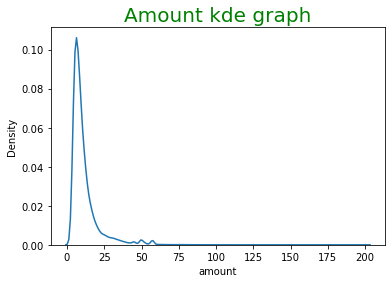

In [107]:
sns.distplot(taxi["amount"],hist=False)
plt.title("Amount kde graph",fontsize=20,color="green")
plt.show()

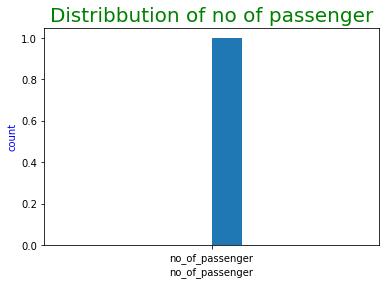

In [114]:
plt.hist(["no_of_passenger"],data=taxi)
plt.title("Distribbution of no of passenger",fontsize=20,color="green")
plt.xlabel("no_of_passenger",color="black")
plt.ylabel("count",color="Blue")
plt.show()

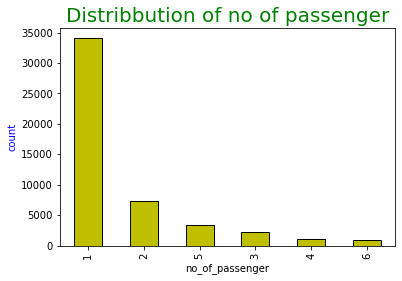

In [116]:
taxi["no_of_passenger"].value_counts().plot.bar(color='y',edgecolor='k');
plt.title("Distribbution of no of passenger",fontsize=20,color="green")
plt.xlabel("no_of_passenger",color="black")
plt.ylabel("count",color="Blue")
plt.show()

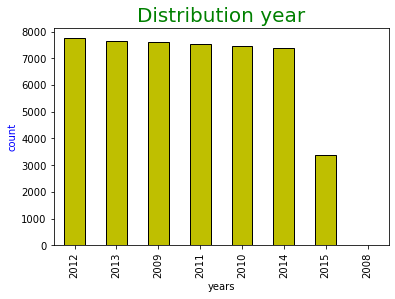

In [121]:
taxi["pickup_year"].value_counts().plot.bar(color='y',edgecolor='k');
plt.title("Distribution year",fontsize=20,color="green")
plt.xlabel("years",color="black")
plt.ylabel("count",color="Blue")
plt.show()

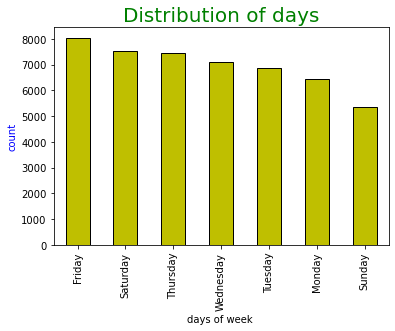

In [123]:
taxi["pickup_day_of_week"].value_counts().plot.bar(color='y',edgecolor='k');
plt.title("Distribution of days",fontsize=20,color="green")
plt.xlabel("days of week ",color="black")
plt.ylabel("count",color="Blue")
plt.show()

In [124]:
taxi["no_of_passenger"].value_counts()

1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: no_of_passenger, dtype: int64

(-74.03, -73.75)

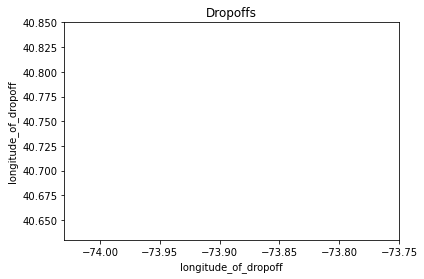

In [126]:
city_long_border=(-74.03,-73.75)
city_lat_border=(40.63,40.85)

taxi.plot(kind="scatter", x="longitude_of_dropoff", y="longitude_of_dropoff",
          color='yellow',s=.02,alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)


In [319]:
taxi.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
pickup_date              object
pickup_day                int64
pickup_hour               int64
pickup_day_of_week       object
pickup_month              int64
pickup_year               int64
mornight                  int32
distance                float64
dtype: object

<AxesSubplot:xlabel='amount'>

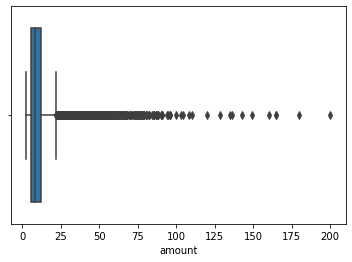

In [321]:
sns.boxplot("amount",data=taxi)

<AxesSubplot:xlabel='distance'>

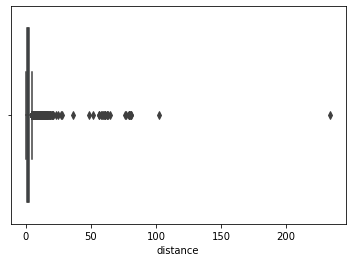

In [322]:
sns.boxplot("distance",data=taxi)

<AxesSubplot:xlabel='no_of_passenger'>

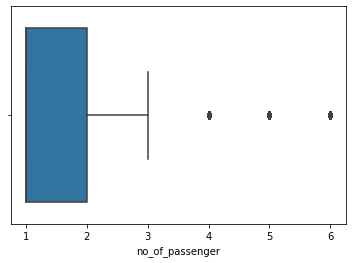

In [323]:
sns.boxplot("no_of_passenger",data=taxi)

<AxesSubplot:xlabel='pickup_hour'>

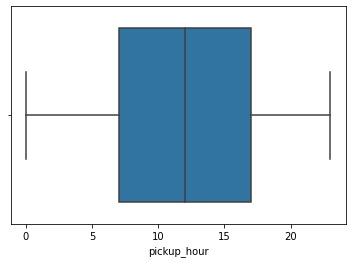

In [324]:
sns.boxplot("pickup_hour",data=taxi)

<AxesSubplot:xlabel='longitude_of_pickup'>

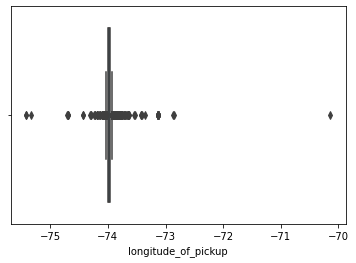

In [325]:
sns.boxplot("longitude_of_pickup",data=taxi)

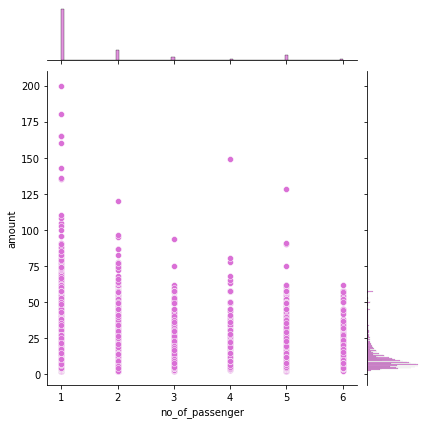

In [327]:
sns.jointplot(x="no_of_passenger",y="amount",data=taxi,color="orchid")
plt.show()

In [127]:
 #by using haversine Distance
def distance(lat1,lon1,lat2,lon2):
    p=0.017453292519943295  # pi/180
    a=0.5- np.cos((lat2-lat1)* p)/2 +np.cos(lat1*p)* np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 *np.arcsin(np.sqrt(a))

taxi["distance"]=distance(taxi.latitude_of_pickup,taxi.longitude_of_pickup,\
                               taxi.latitude_of_dropoff,taxi.longitude_of_dropoff)
taxi.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,mornight,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,13,Monday,6,2009,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,12,Tuesday,1,2010,1,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17,17,20,Wednesday,8,2011,1,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,0,Saturday,4,2012,0,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,3,Tuesday,3,2010,0,1.242218


In [128]:
taxi_final=taxi.copy()
taxi_final.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,mornight,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,13,Monday,6,2009,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,12,Tuesday,1,2010,1,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17,17,20,Wednesday,8,2011,1,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,0,Saturday,4,2012,0,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,3,Tuesday,3,2010,0,1.242218


In [130]:
variables={'Monday':1,'Tuesday':2,'Thursday':3,'Saturdday':4,'Wednesday':5,'Sunday':6,'Friday':7}
year={2012:1,2013:2,2011:3,2009:4,2010:5,2014:6,2015:7}
taxi_final["pickup_year"]=taxi_final["pickup_year"].map(year)
taxi_final["pickup_day_of_week"]=taxi_final["pickup_day_of_week"].map(variables)
taxi_final.drop(["pickup_date"],axis=1,inplace=True)
taxi_final.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,mornight,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,13,1.0,6,4.0,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,12,2.0,1,5.0,1,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,17,20,5.0,8,3.0,1,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,0,NaN,4,1.0,0,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2.0,3,5.0,0,1.242218


In [136]:
#outliers 
q1=taxi_final.quantile(0.25)
q3=taxi_final.quantile(0.75)
iqr=q3-q1
print("/n InternalQuantileRange=/n",iqr)
taxi_final1=taxi_final[~((taxi_final < (q1-1.5*iqr)) | (taxi_final > (q3+1.5*iqr))).any(axis=1)]
taxi_final1.head(5)
taxi_final1.shape

/n InternalQuantileRange=/n amount                   6.500000
longitude_of_pickup      0.023940
latitude_of_pickup       0.031275
longitude_of_dropoff     0.026005
latitude_of_dropoff      0.032577
no_of_passenger          1.000000
pickup_day              15.000000
pickup_hour             10.000000
pickup_day_of_week       4.000000
pickup_month             6.000000
pickup_year              3.000000
mornight                 1.000000
distance                 1.664690
dtype: float64


(37094, 13)

In [138]:
taxi_final.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
pickup_day                int64
pickup_hour               int64
pickup_day_of_week      float64
pickup_month              int64
pickup_year             float64
mornight                  int32
distance                float64
dtype: object

In [142]:
taxi_final.shape

(48803, 13)

In [144]:
taxi_final1.shape


(37094, 13)

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
pickup_day                int64
pickup_hour               int64
pickup_day_of_week      float64
pickup_month              int64
pickup_year             float64
mornight                  int32
distance                float64
dtype: object

In [151]:
taxi_f=taxi_final1.dropna()

In [152]:
taxi_f.shape

(31436, 13)

In [153]:
taxi_f.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
mornight                0
distance                0
dtype: int64

In [154]:
X=taxi_f.drop(["amount"],axis=1)
Y=taxi_f["amount"]

In [160]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [161]:
model_1=LinearRegression()

In [162]:
model_1.fit(X_train,Y_train)

LinearRegression()

In [163]:
model_1.score(X_train,Y_train)

0.6469792282944528

In [164]:
model_1.score(X_test,Y_test)

0.6458358206815187

In [219]:
from sklearn.tree import DecisionTreeRegressor

In [220]:
model_2=DecisionTreeRegressor()


In [221]:
model_2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [222]:
model_3.score(X_train,Y_train)

1.0

In [223]:
model_3.score(X_test,Y_test)

0.4114677257467123

In [228]:
from sklearn.ensemble import BaggingRegressor

In [251]:
model_2=BaggingRegressor(n_estimators=90,base_estimator=model_3)

In [252]:
model_2.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=90)

In [253]:
model_2.score(X_train,Y_train)

0.9607756837665072

In [254]:
model_2.score(X_test,Y_test)

0.7221732523532868

In [255]:
from sklearn.ensemble import AdaBoostRegressor

In [260]:
model_4=AdaBoostRegressor(n_estimators=1)

In [261]:
model_4.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=1)

In [262]:
model_4.score(X_train,Y_train)

0.6354001927436674

In [263]:
model_4.score(X_test,Y_test)

0.6295832797825356

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

In [268]:
model_5=GradientBoostingRegressor()

In [269]:
model_5.fit(X_train,Y_train)

GradientBoostingRegressor()

In [270]:
model_5.score(X_train,Y_train)

0.7435900860961667

In [271]:
model_5.score(X_test,Y_test)

0.7309508790660931

In [285]:
from sklearn.ensemble import RandomForestRegressor

In [315]:
model_6=RandomForestRegressor(n_estimators=60,max_features=5)

In [316]:
model_6.fit(X_train,Y_train)

RandomForestRegressor(max_features=5, n_estimators=60)

In [317]:
model_6.score(X_train,Y_train)

0.9619005402881018

In [318]:
model_6.score(X_test,Y_test)

0.7340962660643068